# Finance News Sentiment Analysis using finBERT

Dataset : [Kaggle Link](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news)

Model : [ProsusAI/finbert](https://huggingface.co/ProsusAI/finbert)

In [1]:
%pip install transformers torch numpy pandas

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import pandas as pd

In [10]:
df = pd.read_csv('all-data.csv', encoding = "ISO-8859-1")
df=df.sample(200)
df

,result,content
210,neutral,"In 2007 , Contempus generated revenue of NOK 6..."
3338,neutral,The proposed consolidation activities will imp...
1993,positive,The layoffs were aimed at reaching an annual s...
4240,neutral,The appointments will be in force until the ne...
4175,negative,ArcelorMittal Chief Executive Officer Lakshmi ...
...,...,...
635,neutral,The Vuokatti unit will be developed to focus e...
2653,neutral,The natural source of isoprene is the tree spe...
1615,neutral,The company had hoped the new plant would be o...
2041,neutral,The company 's net sales in 2010 totalled MEUR...


In [4]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [5]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
nlp=pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [11]:
texts = list(df.content.values)

In [12]:
results=nlp(texts)

In [14]:
df['sentiment'] = [r['label'] for r in results]
df

,result,content,sentiment
210,neutral,"In 2007 , Contempus generated revenue of NOK 6...",neutral
3338,neutral,The proposed consolidation activities will imp...,neutral
1993,positive,The layoffs were aimed at reaching an annual s...,positive
4240,neutral,The appointments will be in force until the ne...,neutral
4175,negative,ArcelorMittal Chief Executive Officer Lakshmi ...,negative
...,...,...,...
635,neutral,The Vuokatti unit will be developed to focus e...,neutral
2653,neutral,The natural source of isoprene is the tree spe...,neutral
1615,neutral,The company had hoped the new plant would be o...,positive
2041,neutral,The company 's net sales in 2010 totalled MEUR...,neutral


<Axes: >

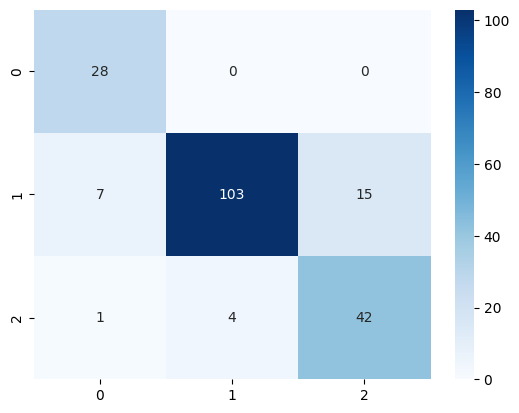

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = df['result']
y_pred = df['sentiment']

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')


In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.865
